In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [26]:
# Find the most recent date in the data set.
session.query(Measurements.date).order_by(Measurements.date.desc()).first()

('2017-08-23',)

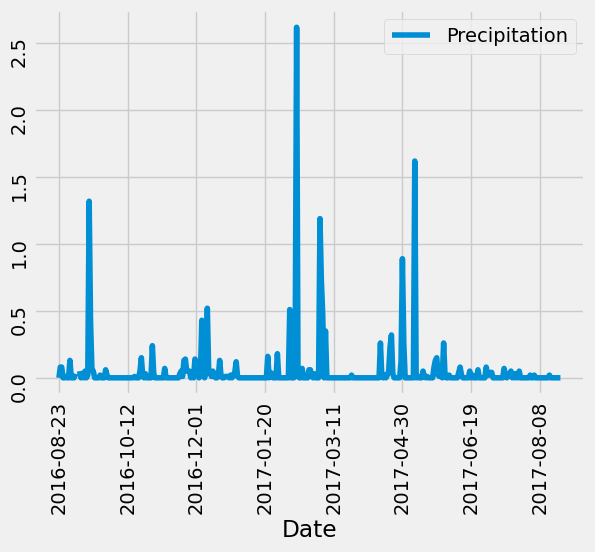

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_12_months = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
p_scores = session.query(Measurements.date, Measurements.prcp).\
    filter(Measurements.date >= last_12_months).\
    group_by(Measurements.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
p_scores_df = pd.DataFrame(p_scores, columns=["Date", "Precipitation"])


# Sort the dataframe by date
p_scores_df.set_index("Date", inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
p_scores_df.plot()
plt.tight_layout()
plt.tick_params(rotation=90)
plt.show()

In [35]:
# Use Pandas to calculate the summary statistics for the precipitation data
p_scores_df.describe()
    


,Precipitation
count,364.000000
mean,0.048709
std,0.204930
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


# Exploratory Station Analysis

In [36]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Stations.station)).all()

[(9,)]

In [37]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurements.station, func.count(Measurements.station)).\
    group_by(Measurements.station).\
    order_by(func.count(Measurements.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [40]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurements.tobs), func.max(Measurements.tobs), func.avg(Measurements.tobs)).\
    filter(Measurements.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

array([<Axes: title={'center': 'USC00519281'}, ylabel='Frequency'>],
      dtype=object)

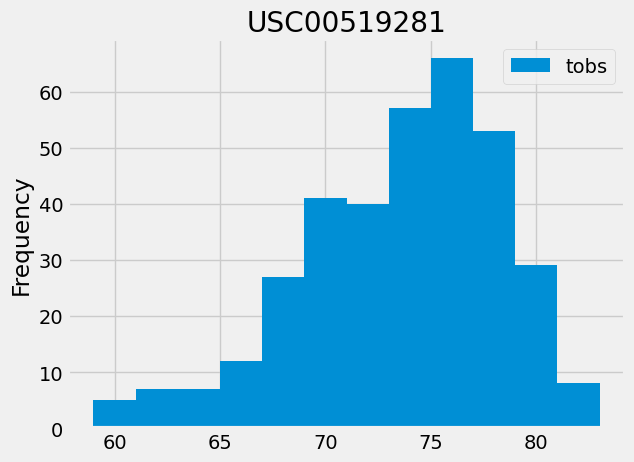

In [47]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurements.station, Measurements.tobs).\
            filter(Measurements.station == 'USC00519281').\
            filter(Measurements.date >= last_12_months).all()

plot_df = pd.DataFrame (temp_data)

plot_df.plot.hist(by="station", bins=12)

# Close Session

In [48]:
# Close Session
session.close()